In [384]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPooling2D, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline 

In [385]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [386]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

<Axes: xlabel='label', ylabel='Count'>

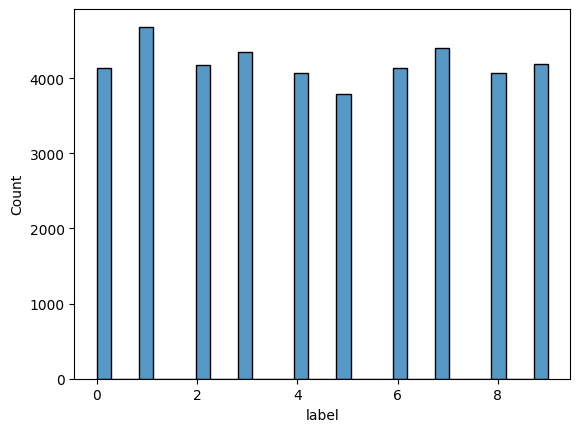

In [387]:
sns.histplot(Y_train)

In [388]:
# Normalization

train = train / 255.0
X_train = X_train / 255.0
test = test / 255.0

In [389]:
# 2D matrix

X_train = X_train.values.reshape(-1, 28,28, 1)
test = test.values.reshape(-1, 28,28, 1)


In [390]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [391]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=2)

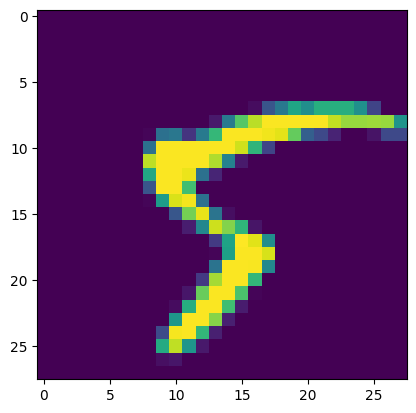

In [392]:
plt.imshow(X_train[0])
plt.show()

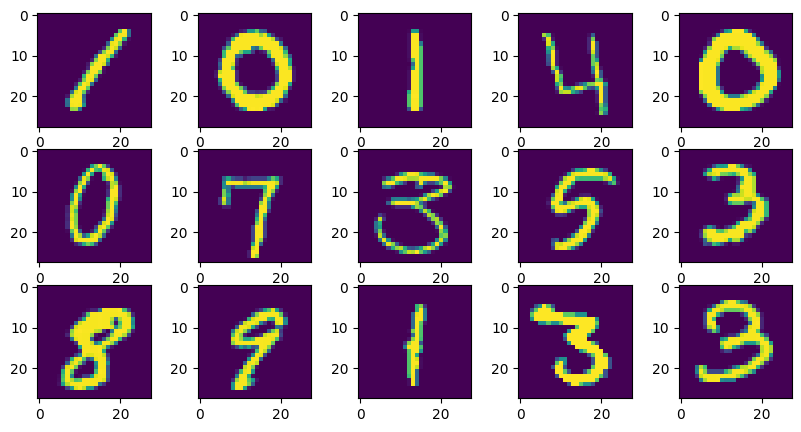

In [393]:
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 5));
k = 0 
for i in range(0, 3):
    for j in range(0, 5):
        axs[i, j].imshow(train.iloc[k,1:].to_numpy().reshape(28,28));
        k += 1
plt.show();

In [394]:
model = Sequential()
    
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [396]:
model.fit(X_train, Y_train, batch_size = 100, epochs = 1, validation_data = (X_val, Y_val), verbose = 2)
#loss,acc = model.evaluate(test,Y_train)

315/315 - 98s - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0461 - val_accuracy: 0.9857 - 98s/epoch - 312ms/step


In [397]:
pred = model.predict(test)
pred.shape

875/875 [==============================] - 20s 23ms/step


(28000, 10)

In [398]:
preds = []
for i in range(28000):
    preds.append(np.argmax(pred[i]))

In [400]:
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = preds

In [ ]:
submission.to_csv('submission.csv',index=False)